# Hand written recognition System

### Importing Necessary Libraries

In [1]:
pip install keras

     |████████████████████████████████| 1.3 MB 35.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

     |████████████████████████████████| 65 kB 8.1 MB/s  eta 0:00:01
     |████████████████████████████████| 3.8 MB 56.0 MB/s eta 0:00:01
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.35.0
    Uninstalling grpcio-1.35.0:
      Successfully uninstalled grpcio-1.35.0
  Attempting uninstall: opt-einsum
    Found existing installation: opt-einsum 3.1.0
    Uninstalling opt-einsum-3.1.0:
      Successfully uninstalled opt-einsum-3.1.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 20210226132247
    Uninstalling flatbuffers-20210226132247:
      Successfully uninstalled flatbuffers-20210226132247
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install np_utils

     |████████████████████████████████| 61 kB 13.2 MB/s eta 0:00:01
  Created wheel for np-utils: filename=np_utils-0.5.12.1-py3-none-any.whl size=57125 sha256=9e313a1f8c46bec81e18306e3af007e9cb3451a8366e2e399d10da14b9423743
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/57/18/82/402fcaf521e84dfa67b077aea34d225fc32ce6085e2cb8dda6
Successfully built np-utils
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy #used for numerical analysis
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataser
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A layer consists of a tensor-in tensor-out computation function
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense layer is the regular deeply connected neural network layer
#Faltten-used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #Convolutional layer
from tensorflow.keras.optimizers import Adam #optimizer
from tensorflow.keras.utils import to_categorical #used for one-hot encoding

# load data


In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #splitting the mnist data into train and test

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
print(X_train.shape)#shape is used for give the dimension values #60000-rows 28x28-pixels 
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Understanding the data

In [7]:
X_train[0]#printing the first image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train[0]#printing lable of first image

5

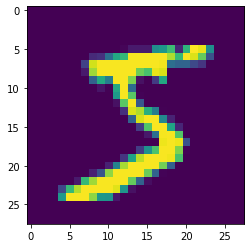

In [9]:
import matplotlib.pyplot as plt #used for data visualization
plt.imshow(X_train[0]) #ploting the index=0 image

### Reshaping Dataset

In [10]:
# Reshaping to format which CNN expects (batch, height, width, channels)
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

### One-Hot Encoding

In [11]:
# one hot encode
number_of_classes = 10 #storing the no. classes in a variable
y_train = to_categorical(y_train, number_of_classes) #converts the output in binary format
y_test = to_categorical(y_test, number_of_classes)

In [12]:
y_train[0] #printing the new label

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Creating the Model

In [13]:
# create model
model = Sequential() 
# adding model layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(Conv2D(32, (3, 3), activation='relu'))
#flatten the dimension of the image
model.add(Flatten())
#output layer with 10 neurons
model.add(Dense(number_of_classes, activation='softmax'))

### Compiling the model

In [14]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

### Fitting the model

In [15]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 192s 102ms/step - loss: 1.2492 - accuracy: 0.9090 - val_loss: 0.0929 - val_accuracy: 0.9721
Epoch 2/5
1875/1875 [==============================] - 189s 101ms/step - loss: 0.0709 - accuracy: 0.9783 - val_loss: 0.0796 - val_accuracy: 0.9736
Epoch 3/5
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0422 - accuracy: 0.9863 - val_loss: 0.0908 - val_accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0369 - accuracy: 0.9877 - val_loss: 0.0965 - val_accuracy: 0.9776
Epoch 5/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0246 - accuracy: 0.9916 - val_loss: 0.1013 - val_accuracy: 0.9771


In [19]:
from tensorflow.keras.models import load_model
model.save('hand.h5')

In [20]:
!tar -zcvf image-classification-model_new.tgz hand.h5

hand.h5


In [21]:
ls -1

hand.h5
image-classification-model_new.tgz


### Observing the metrics

### Predicting the output 

### Taking images as input and checking results

### Saving the model

In [24]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 33.5 MB/s eta 0:00:01


In [25]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [26]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey":"NRJr__toDdrbaHfLFvwb110gWcHiYmsoKCPGS9sBIvGe"
}
client = APIClient(wml_credentials)

In [27]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [28]:
space_uid = guid_from_space_name(client, 'mini_project')
print("Space UID - " + space_uid)

Space UID - c258071b-0426-48c2-bc6d-dcca920bbe4c


In [29]:
client.set.default_space(space_uid)

'SUCCESS'

In [32]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_2.4-py3.7")
software_spec_uid

'65e171d7-72d1-55d9-8ebb-f813d620c9bb'

In [33]:
model_details = client.repository.store_model(model='image-classification-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:"keras_2.2.4",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})
model_id = client.repository.get_model_uid(model_details)

Note: Warnings!! :  Model type keras_2.2.4 is deprecated. We recommend you use a supported model type. See Supported Frameworks https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [34]:
model_id

'8839bf11-e838-4038-8924-73eb30271719'

In [35]:
client.repository.download(model_id,'handwritten.tar.gz')

Successfully saved model content to file: 'handwritten.tar.gz'


'/home/wsuser/work/handwritten.tar.gz'